In [3]:
import json
import matplotlib.pyplot as plt
import time
from haversine import haversine
import math

## Get Data

In [4]:
with open("tweets.json", "r") as file:
    tweets = json.load(file)
tweets

[{'lat': 37.44609999,
  'text': '@Tanner_Cortez hey checkout the website: http://t.co/LuktJ6hiws',
  'lng': -121.88355687,
  'id': 377652254096228352,
  'timeStamp': 'Wed Sep 11 04:38:08 +0000 2013'},
 {'lat': 34.08740583,
  'text': '@Lennayy7 😪',
  'lng': -117.46260401,
  'id': 377652255346159616,
  'timeStamp': 'Wed Sep 11 04:38:08 +0000 2013'},
 {'lat': 37.3561311,
  'text': 'i laugh a lot with that line',
  'lng': -121.8428674,
  'id': 377652262325456897,
  'timeStamp': 'Wed Sep 11 04:38:10 +0000 2013'},
 {'lat': 37.36466443,
  'text': 'sons of anarchy is back on woop woop',
  'lng': -122.00962878,
  'id': 377652264682655744,
  'timeStamp': 'Wed Sep 11 04:38:11 +0000 2013'},
 {'lat': 37.3826,
  'text': "Drinking a Fresh Squeezed IPA by @deschutesbeer @ St. John's Bar &amp; Grill — http://t.co/z4Gf5hxlo4",
  'lng': -121.995,
  'id': 377652271116722176,
  'timeStamp': 'Wed Sep 11 04:38:12 +0000 2013'},
 {'lat': 37.75614896,
  'text': 'I have 8 am classes this quarter ... I need to ge

In [5]:
print(len(tweets))

100000


## Part 1

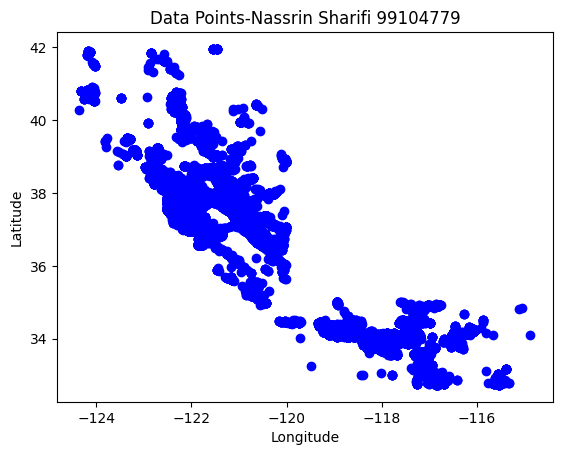

Execution time: 1.40076 seconds


In [18]:
start = time.time()
latitudes = [point["lat"] for point in tweets]
longitudes = [point["lng"] for point in tweets]

plt.scatter(longitudes, latitudes, color="blue")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Data Points-Nassrin Sharifi 99104779")
plt.savefig("Data Points")
plt.show()
duration = time.time() - start
print(f"Execution time: {duration:.5f} seconds")

## Part 2

In [7]:
""" my student ID : 99104779 
    centroid coordinates : (41.71838874769764, -122.34069473647976)
 """
center_lat = 41.71838874769764
center_lng = -122.34069473647976
centroid = (center_lat, center_lng)
radius = 50 * 1000
area = math.pi * (radius) ** 2


def within_radius(point_1: tuple, point_2: tuple) -> float:
    distance = haversine(point_1, point_2, unit="m")
    if distance <= radius:
        return True
    else:
        return False


count_points = 0
for item in tweets:
    point = (item["lat"], item["lng"])
    if within_radius(point, centroid):
        count_points += 1

density = count_points / area  # unit: num of points/ square meters
print(f"Density is {density} points/m^2 ")

Density is 8.785352858672623e-09 points/m^2 


## Part 3

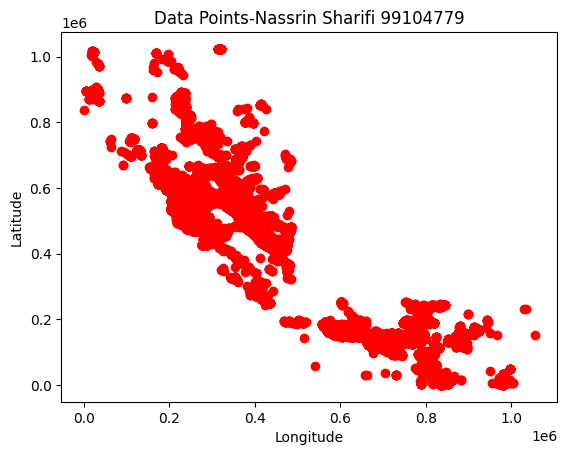

In [8]:
origin_point = (min(latitudes), min(longitudes))  # (32.72992914, -124.35133333)
virtual_latitudes = []
virtual_longitudes = []

from geopy.distance import geodesic


#to calculate differences in latitudes and longitudes in meters
def calculate_latitude_difference(lat1, lat2):
    return geodesic((lat1, 0), (lat2, 0)).meters


def calculate_longitude_difference(lon1, lon2):
    return geodesic((0, lon1), (0, lon2)).meters


for i in range(len(latitudes)):
    lat_diff = calculate_latitude_difference(latitudes[i], origin_point[0])
    lng_diff = calculate_longitude_difference(longitudes[i], origin_point[1])
    virtual_latitudes.append(lat_diff)
    virtual_longitudes.append(lng_diff)

plt.scatter(virtual_longitudes, virtual_latitudes, color="red")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Data Points-Nassrin Sharifi 99104779")
plt.savefig("Data Points (red)")
plt.show()

In [10]:
import pandas as pd
from sklearn.cluster import KMeans

data = pd.DataFrame(tweets)
data


,lat,text,lng,id,timeStamp
0,37.446100,@Tanner_Cortez hey checkout the website: http:...,-121.883557,377652254096228352,Wed Sep 11 04:38:08 +0000 2013
1,34.087406,@Lennayy7 😪,-117.462604,377652255346159616,Wed Sep 11 04:38:08 +0000 2013
2,37.356131,i laugh a lot with that line,-121.842867,377652262325456897,Wed Sep 11 04:38:10 +0000 2013
3,37.364664,sons of anarchy is back on woop woop,-122.009629,377652264682655744,Wed Sep 11 04:38:11 +0000 2013
4,37.382600,Drinking a Fresh Squeezed IPA by @deschutesbee...,-121.995000,377652271116722176,Wed Sep 11 04:38:12 +0000 2013
...,...,...,...,...,...
99995,34.468682,I miss jumping Burke and Austin in weight trai...,-118.560411,378989660057239552,Sat Sep 14 21:12:30 +0000 2013
99996,37.302844,"Before, During, and After the run. #colourmer...",-121.853312,378989667414441984,Sat Sep 14 21:12:32 +0000 2013
99997,37.807181,Gara 7 @americascup #sf @fabricapo @internetli...,-122.437181,378989681280438273,Sat Sep 14 21:12:35 +0000 2013
99998,37.645648,@dark_Jero esto fue un twist de alguien q sabe...,-122.455342,378989693112557568,Sat Sep 14 21:12:38 +0000 2013


## Part 3.1.1

C:\Python Projects\Interpreters\ITS\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


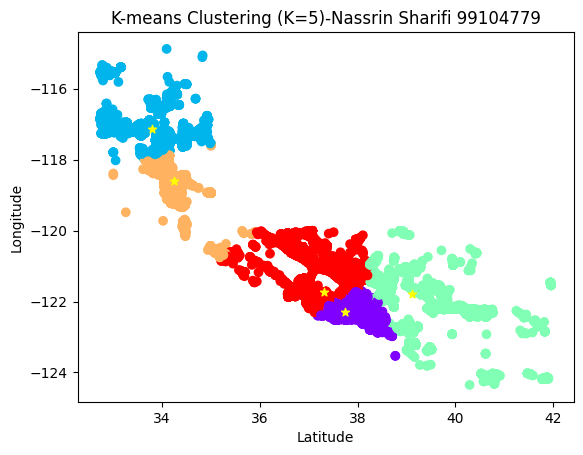

In [11]:
# choose the features of clustering
features = ["lat", "lng"]
X = data[features]

n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the dataset
data["Cluster"] = cluster_labels
duration = time.time() - start

# Plot the clusters
plt.scatter(data["lat"], data["lng"], c=data["Cluster"], cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color="yellow", marker="*")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title(f"K-means Clustering (K={n_clusters})-Nassrin Sharifi 99104779")
plt.savefig("K-means Clustering 3-1-1")
plt.show()

In [29]:
# kmeans.cluster_centers_

### Part 3.1.2

C:\Python Projects\Interpreters\ITS\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


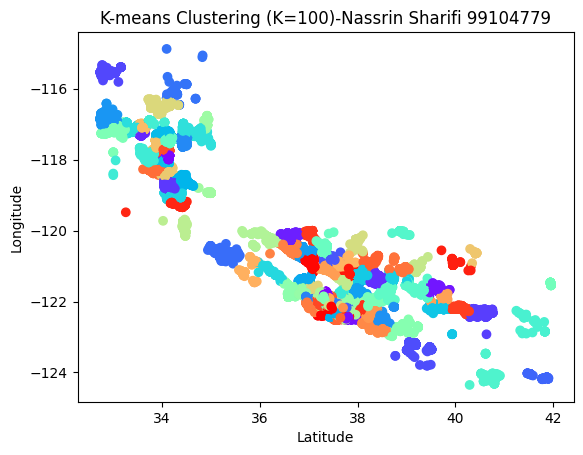

It took 9.89159 seconds


In [12]:
start = time.time()
# choose the features of clustering
features = ["lat", "lng"]
X = data[features]

n_clusters = 100
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the dataset
data["Cluster"] = cluster_labels
duration = time.time() - start
# Plot the clusters
plt.scatter(data["lat"], data["lng"], c=data["Cluster"], cmap="rainbow")
# plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color="yellow",marker="*")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title(f"K-means Clustering (K={n_clusters})-Nassrin Sharifi 99104779")
plt.savefig("K-means Clustering 3-1-2")
plt.show()

print(f"It took {duration:.5f} seconds")

### Part 3.1.3

C:\Python Projects\Interpreters\ITS\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


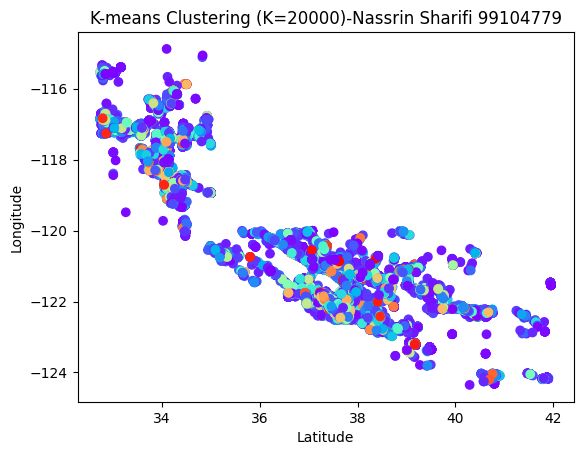

It took 2232.44980 seconds


In [13]:
start = time.time()
# choose the features of clustering
features = ["lat", "lng"]
X = data[features]

n_clusters = 20_000
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the dataset
data["Cluster"] = cluster_labels
duration = time.time() - start
# Plot the clusters
plt.scatter(data["lat"], data["lng"], c=data["Cluster"], cmap="rainbow")
# plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color="yellow",marker="*")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title(f"K-means Clustering (K={n_clusters})-Nassrin Sharifi 99104779")
plt.savefig("K-means Clustering 3-1-3")
plt.show()

print(f"It took {duration:.5f} seconds")

### Part 3.1.4

C:\Python Projects\Interpreters\ITS\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Python Projects\Interpreters\ITS\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Python Projects\Interpreters\ITS\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Python Projects\Interpreters\ITS\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will chang

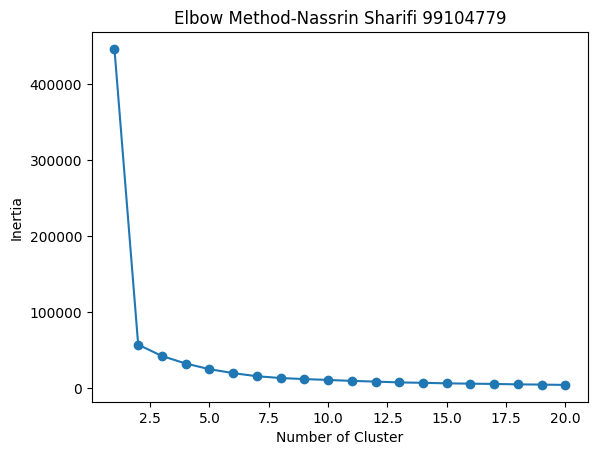

In [14]:

# Perform K-means clustering for a range of cluster numbers
max_clusters = 20
inertia = []
for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, max_clusters + 1), inertia, marker="o")
plt.xlabel("Number of Cluster")
plt.ylabel("Inertia")
plt.title("Elbow Method-Nassrin Sharifi 99104779")
plt.savefig("Elbow 3-1-4")
plt.show()

### Part 3.2.1 and 3.2.2

C:\Python Projects\Interpreters\ITS\Lib\site-packages\sklearn\cluster\_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


batch size:512


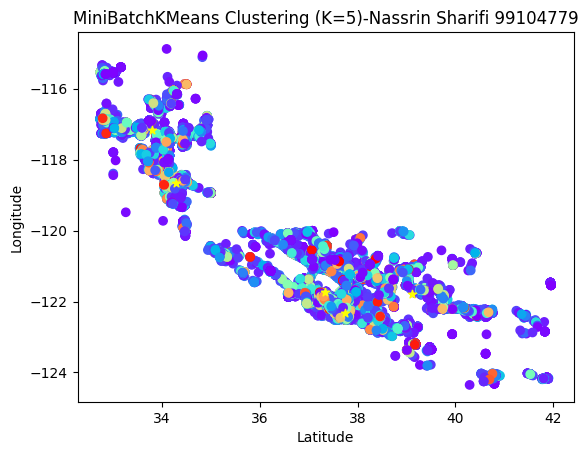

It took 0.16000 seconds


In [15]:
from sklearn.cluster import MiniBatchKMeans

start = time.time()
#we are using the same data and features as the previous method here!
X = data[features]

n_clusters = 5
batch_size = 512
kmeans = MiniBatchKMeans(n_clusters=5, batch_size=batch_size, random_state=42)
kmeans.fit(X)
duration = time.time() - start

# cluster_labels = kmeans.labels_
# print(cluster_labels)
print(f"batch size:{kmeans.batch_size}")

# Plot the clusters
plt.scatter(data["lat"], data["lng"], c=data["Cluster"], cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color="yellow", marker="*")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title(f"MiniBatchKMeans Clustering (K={n_clusters})-Nassrin Sharifi 99104779")
plt.savefig("MiniBatchKMeans Clustering 3-2-1")
plt.show()

print(f"It took {duration:.5f} seconds")

### Part 3.2.3

C:\Python Projects\Interpreters\ITS\Lib\site-packages\sklearn\cluster\_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


batch size:512


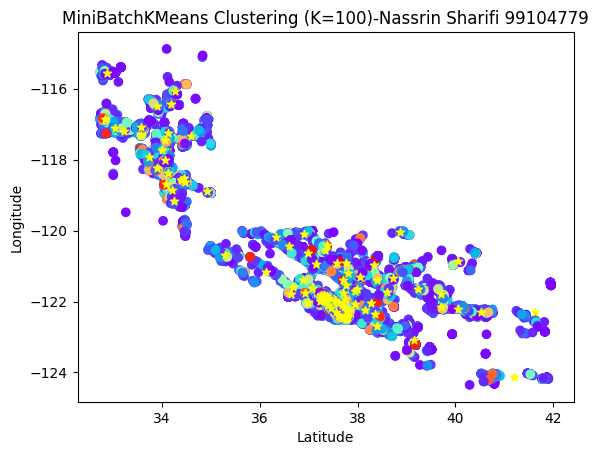

It took 0.69136 seconds


In [16]:
start = time.time()

X = data[features]

n_clusters = 100
batch_size = 512
kmeans = MiniBatchKMeans(n_clusters=n_clusters, batch_size=batch_size, random_state=42)
kmeans.fit(X)
duration = time.time() - start

# cluster_labels = kmeans.labels_
# print(cluster_labels)
print(f"batch size:{kmeans.batch_size}")

# Plot the clusters
plt.scatter(data["lat"], data["lng"], c=data["Cluster"], cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color="yellow", marker="*")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title(f"MiniBatchKMeans Clustering (K={n_clusters})-Nassrin Sharifi 99104779")
plt.savefig("MiniBatchKMeans Clustering 3-2-2")
plt.show()

print(f"It took {duration:.5f} seconds")

### Part 3.2.6

C:\Python Projects\Interpreters\ITS\Lib\site-packages\sklearn\cluster\_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Python Projects\Interpreters\ITS\Lib\site-packages\sklearn\cluster\_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Python Projects\Interpreters\ITS\Lib\site-packages\sklearn\cluster\_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Python Projects\Interpreters\ITS\Lib\site-packages\sklearn\cluster\_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from

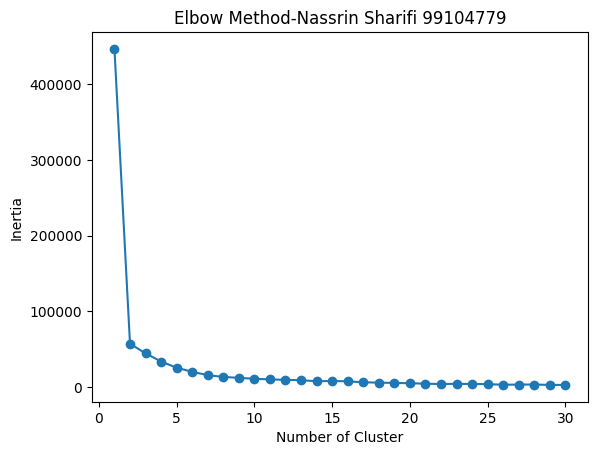

In [17]:
# Perform K-means clustering for a range of cluster numbers
max_clusters = 30
inertia = []
for k in range(1, max_clusters + 1):
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, max_clusters + 1), inertia, marker="o")
plt.xlabel("Number of Cluster")
plt.ylabel("Inertia")
plt.title("Elbow Method-Nassrin Sharifi 99104779")
plt.savefig("Elbow 3-2-6")
plt.show()

### Part 3.3.1 and 3.3.2

In [ ]:
from sklearn.cluster import DBSCAN
start=time.time()
X = data[features]
epsilon = 0.5
min_samples = 100
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
dbscan.fit_predict(X)
duration = time.time()-start
print(f"It took {duration} seconds")




